Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

Load Titanic Train dataset 

In [2]:
df = pd.read_csv("Titanic_train.csv")

Basic EDA

In [3]:
print(df.head())        # First 5 rows
print(df.info())        # Column types & non-null counts
print(df.describe())    # Summary statistics
print(df["Survived"].value_counts())  # Check target distribution

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Preprocessing


In [4]:
# Drop irrelevant columns
X = df.drop(["Survived", "Name", "Ticket", "Cabin"], axis=1)
y = df["Survived"]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Handle missing values (numerical only here)
imputer = SimpleImputer(strategy="median")   # Fill missing values with median
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

Split dataset into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Scale features

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # Fit on training set
X_test_scaled = scaler.transform(X_test)         # Apply same scaling to test set


Build Logistic Regression model

In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

Make predictions

In [8]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

Evaluate model performance

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.8044692737430168
Precision: 0.7746478873239436
Recall: 0.7432432432432432
F1-score: 0.7586206896551724
ROC-AUC: 0.8759330759330759


 Plot ROC curve

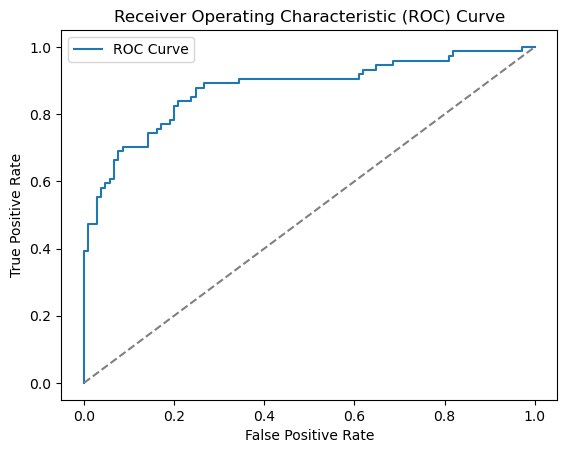

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1], [0,1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

Interpret coefficients


In [11]:
coeff = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_[0]
})
coeff["Odds Ratio"] = np.exp(coeff["Coefficient"])
print(coeff.sort_values(by="Odds Ratio", ascending=False))

       Feature  Coefficient  Odds Ratio
5         Fare     0.126402    1.134738
0  PassengerId     0.093980    1.098538
7   Embarked_Q    -0.047698    0.953421
4        Parch    -0.103597    0.901588
8   Embarked_S    -0.195645    0.822304
3        SibSp    -0.339165    0.712365
2          Age    -0.396881    0.672414
1       Pclass    -0.780931    0.457980
6     Sex_male    -1.284236    0.276862


**Interview Questions: 1. What is the difference between precision and recall?**

Precision and Recall are both metrics used to evaluate classification models, but they focus on different aspects of performance.

Precision tells me, out of all the instances my model predicted as positive, how many were actually positive? It’s about the accuracy of positive predictions.

Recall tells me, out of all the actual positive instances, how many did my model correctly capture? It’s about the coverage of positives.

For example, in a spam detection system:

High precision means if my model marks an email as spam, it’s almost certainly spam.

High recall means my model catches almost all spam emails, even if it sometimes mislabels a few normal emails.

Which one I prioritize depends on the problem: in medical diagnosis, I’d focus on recall; in spam filtering, I’d focus on precision.

**Interview Questions: 2. What is cross-validation, and why is it important in binary classification?**

Cross-validation is a technique for testing how well a model generalizes to unseen data. Instead of relying on one train-test split, I split the dataset into multiple parts, train on some, and test on the rest, repeating the process several times. The most common method is k-fold cross-validation, where the data is divided into k folds, and the model is trained and evaluated k times.

It’s important in binary classification for a few reasons:

It gives a more reliable estimate of model performance than a single split.

It helps detect overfitting by testing the model across different subsets of the data.

In imbalanced datasets, using stratified cross-validation ensures that each fold has a similar distribution of positive and negative classes, making evaluation fairer.

So overall, cross-validation helps me trust that the model’s performance metrics — like precision, recall, or AUC — are not just due to a lucky split of the data.